<center><img src=img/MScAI_brand.png width=70%></center>

# Plotting with Matplotlib

Data visualisation is an important step in almost every data analysis. In Python there are many plotting libraries, which all accept Numpy arrays as input data. The main plotting library is called Matplotlib, and we will later see another built on top of it, called Seaborn.

<img src=https://matplotlib.org/_static/logo2.png width=30%>

We can plot data directly inside the Jupyter Notebook or inside the IPython console in Spyder. We import and also use a Jupyter magic command (starts with `%`) to enable the inline plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this line tells the notebook to show plots "inline"
%matplotlib inline

Let's say we want to plot the formula $y = 1.7x + 12.3 \sin(3x)$ for all values of $x$ from 0 to 10. Numpy and Matplotlib make it easy as follows.

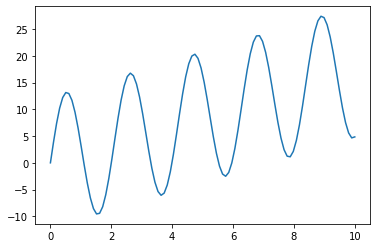

In [2]:
x = np.linspace(0, 10, 100)
y = 1.7 * x + 12.3 * np.sin(3 * x)
plt.plot(x, y);

**Exercise**: why did we put a semi-colon at the end of the last line?

**Exercise**: Plot the formula $0.2 * (0.7^x)$ for $x \in [0, 20]$.

Of course, we can change the plotting style:

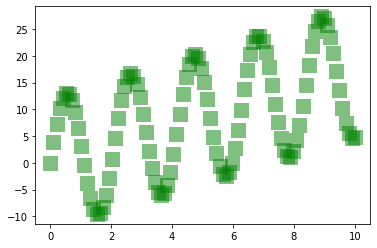

In [3]:
# 's' -> squares instead of lines
# alpha -> transparency
# markersize -> size
# markeredgewidth=0 -> remove borders on markers
plt.plot(x, y, "s", color="g", alpha=0.5, 
         markersize=15, markeredgewidth=0); 

A "stem plot":

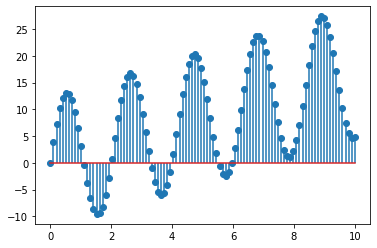

In [4]:
plt.stem(x, y, use_line_collection=True);

We can plot multiple lines on the same plot against the same $x$-axis, using different styles for each, and add a legend:

In [5]:
x = np.linspace(0, 10, 100)
y = 1.7 * x + 12.3 * np.sin(3 * x)
z = 5 + 2 * x - 0.5 * x**2

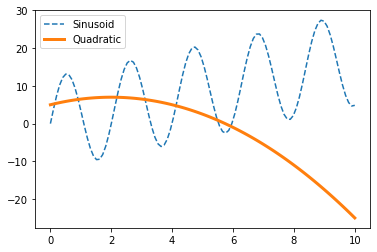

In [6]:
plt.plot(x, y, linestyle="--", label="Sinusoid")
plt.plot(x, z, linewidth=3, label="Quadratic")
plt.legend();

And we should *always* label our axes.

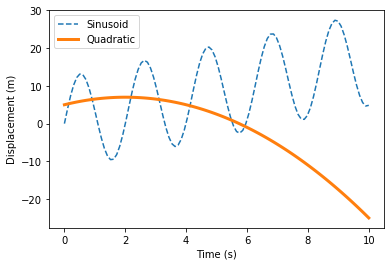

In [7]:
plt.plot(x, y, linestyle="--", label="Sinusoid")
plt.plot(x, z, linewidth=3, label="Quadratic")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)");

### Histograms

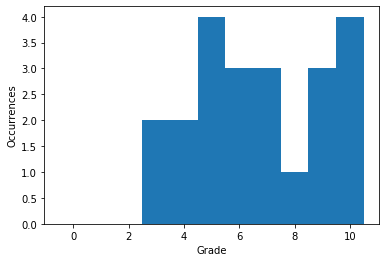

In [8]:
grades = np.loadtxt("data/grades.csv")
# use range to force integer alignment
plt.hist(grades, range=(-0.5, 10.5), bins=11) 
plt.xlabel("Grade")
plt.ylabel("Occurrences");

### Scatter plots

To understand the relationship between a pair of variables, we often start with scatterplots and correlation values. We'll take an example extracted from a dataset with efficiency of cars (miles per gallon). We'll use `np.corrcoef` and then `plt.scatter`.

In [9]:
x = np.loadtxt("data/mpg_extract.csv", delimiter=",")
x.shape # 398 cars, 2 variables: year and efficiency

(398, 2)

In [10]:
r = np.corrcoef(x[:, 0], x[:, 1])
r # show correlation matrix

array([[1.        , 0.57926713],
       [0.57926713, 1.        ]])

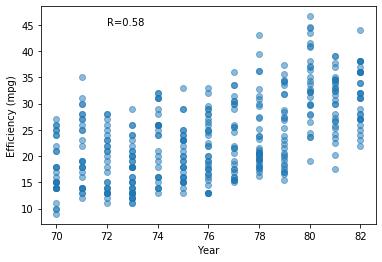

In [11]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Efficiency (mpg)")
plt.text(72, 45, "R=%.2f" % r[0, 1]);

### Using Pandas data

If we have a Pandas DataFrame, we can use it directly instead of extracting columns. Compare:

`plt.plot("xvar", "yvar", data=df)`


`plt.plot(df["xvar"], df["yvar"])`


**Example**: recall the data file `data/sort_times.csv` which we created in the notebook about Pandas. The first column was the independent variable $n$ (the size of the array being sorted), and the other columns were multiple observations of the dependent variable $y$, i.e. the *elapsed time* in seconds. We have already calculated the mean and standard deviation across observations, and stored them as new colums. Now, using `plt.errorbar`: plot the mean of $y$ against $n$, with errorbars given by the standard deviation of $y$.

In [12]:
# index_col=0 tells Pandas that the first column is an index
# not a data column
df = pd.read_csv("data/sort_times.csv", index_col=0) 
df.head() # take a look

,n,run0,run1,run2,run3,run4,mean,sd
0,1000000,0.099246,0.109996,0.101855,0.100453,0.114092,0.105128,0.006543
1,2000000,0.197066,0.194505,0.203326,0.193344,0.256533,0.208955,0.026876
2,3000000,0.302803,0.300889,0.316597,0.365341,0.385361,0.334198,0.038706
3,4000000,0.445487,0.531404,0.416161,0.488978,0.485014,0.473409,0.044152
4,5000000,0.583518,0.580889,0.531411,0.632583,0.543272,0.574335,0.039773


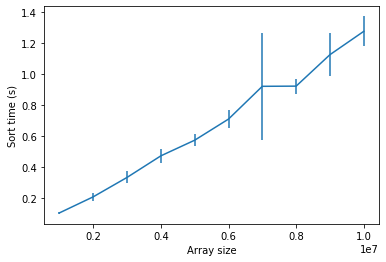

In [13]:
# note use of df column names and 'yerr'
plt.errorbar(x="n", y="mean", yerr="sd", data=df) 
plt.xlabel("Array size")
plt.ylabel("Sort time (s)");

### Inline plots versus saving

Sometimes we want to show a plot in a notebook; sometimes we want to save to disk. The following code will save the plot to a `png` file. You can also use `pdf`, `svg`, and other formats. As we may know, `png` is a bitmap format suitable for the web; `pdf` is a vector format suitable for documents.

In [14]:
plt.savefig("data/sort_times.png")
plt.close()

### Warning

There are at least two different ways of using `matplotlib`:

* Pyplot stateful interface (what we've been using)
* Pyplot object-oriented interface

We've been using the Pyplot stateful interface. A command like `plt.xlabel` changes the `x` label of whatever figure `plt` is currently working on.

Another way of working is the Pyplot object-oriented interface, which is a bit more powerful than the interface we've been using and confusing to mix. Usually plotting starts with `fig, ax = plt.subplots()`. See [discussion here](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Two-Interfaces-for-the-Price-of-One).

If we see some documentation online which involves `pylab`, keep away!

### Further reading

The Matplotlib website https://matplotlib.org/ holds docs, and the gallery works as a cookbook: https://matplotlib.org/gallery/index.html.

Vanderplas has another very nice book with a section on Matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

Some general advice on programming plots:
* Try designing it on paper before programming
* Try making very simple plots in an interactive setting (Jupyter Notebook or Spyder) and then iterating to refine it
* Don't try to remember all the parameters and syntax -- just know how to look for plots e.g. in the galleries.

### Exercises

**Exercise**: Revisit the file `mile_run.txt` which we previously saw in the Pandas notebook. Read it in to a Pandas DataFrame and plot the best time against the year. 

**Exercise**: generate a pseudo-map of the Republic of Ireland by plotting the longitude and latitude of `data/irish_cities.txt`. Plot the city population as size. Hint: extract the population column to an array `size` and manipulate it to give good sizes for the city markers.

### Solutions

In [15]:
!head -n 15 data/mile_run.txt # show the first 15 lines

# The following gives the winning time, in seconds, for the mile run.
# The year in which occured, the name of the runner, and the runner's
# nationality are also given.

# Copied from http://www.math.hope.edu/swanson/data/mile_run.txt and
# edited format -- James McDermott.

Year,Athlete,Nationality,Time(seconds)
1913,John Paul Jones,USA,254.4
1915,Norman Taber,USA,252.6
1923,Paavo Nurmi,Finland,250.4
1931,Jules Ladoumegue,France,249.2
1933,Jack Lovelock,New Zealand,247.6
1934,Glenn Cunningham,USA,246.8
1937,Sydney Wooderson,UK,246.4


In [16]:
df = pd.read_csv("data/mile_run.txt", delimiter=",", skiprows=7)
df.head()

,Year,Athlete,Nationality,Time(seconds)
0,1913,John Paul Jones,USA,254.4
1,1915,Norman Taber,USA,252.6
2,1923,Paavo Nurmi,Finland,250.4
3,1931,Jules Ladoumegue,France,249.2
4,1933,Jack Lovelock,New Zealand,247.6


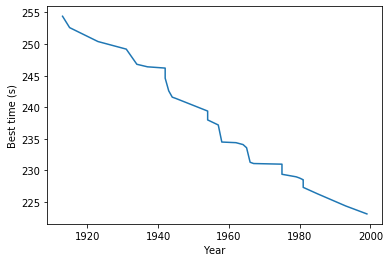

In [17]:
plt.plot("Year", "Time(seconds)", data=df)
plt.xlabel("Year")
plt.ylabel("Best time (s)");

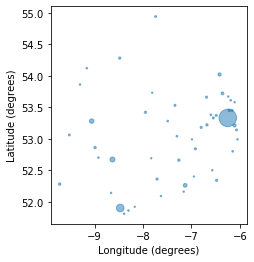

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/irish_cities.txt", sep="\t", skiprows=1)
df = df.rename(columns={"#Rank": "Rank", 
                        "Population (2000)": "Population (M)", 
                        "Latitude (DD)": "Latitude", 
                        "Longitude (DD)": "Longitude"})
df["Population (M)"] /= 10**6
# set the size of the circles
size = df["Population (M)"] * 300
# the "aspect" is the shape -- 1.0m would mean square. 
# we use aspect=1.3 because latitude/longitude 
# are only "square" at the equator
plt.axes().set_aspect(1.3)
# alpha sets the circles slightly transparent
# so you can see overlaps
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.scatter("Longitude", "Latitude", s=size, data=df, alpha=0.5);